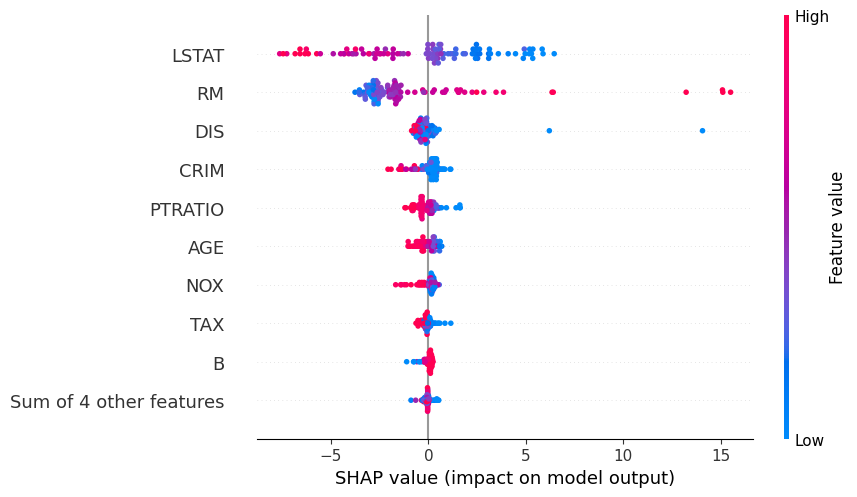

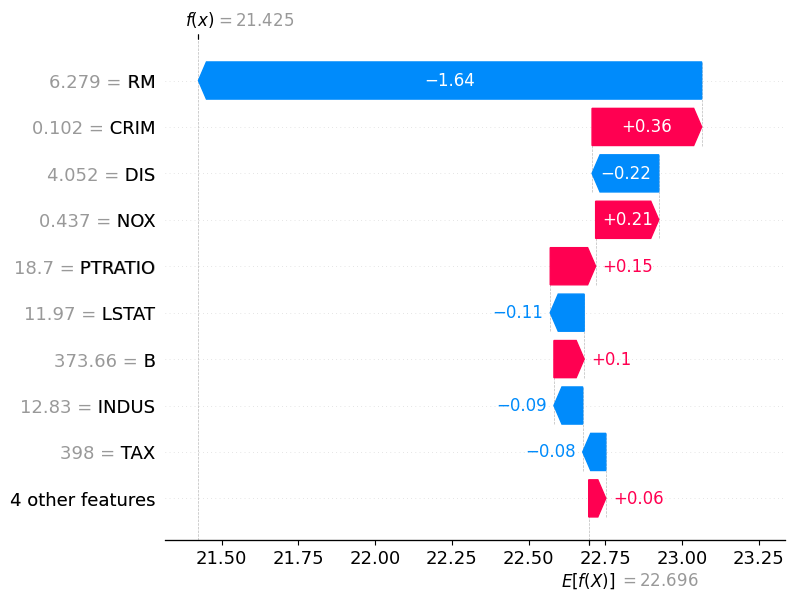

In [2]:
# 07_shap_analysis.ipynb

"""
SHAP 분석을 통해 Random Forest 회귀 모델의 예측 결과를 설명합니다.
SHAP (SHapley Additive exPlanations)은 게임 이론 기반의 특성 기여도 해석 도구입니다.

핵심 개념:
- 각 예측값을 구성하는데 있어 각 피처가 얼마만큼 기여했는지 계산합니다.
- 결과적으로 예측이 왜 그렇게 나왔는지 해석할 수 있습니다.

주의:
- LIME도 유사한 목적의 로컬 설명 도구지만, 샘플 중심입니다.
- SHAP은 전체 모델 기반의 글로벌 + 로컬 해석이 가능
"""

import shap
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# SHAP에서는 X 데이터가 꼭 DataFrame 형태여야 합니다.
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# TreeExplainer 사용 (Random Forest 등 트리 기반 모델에 최적)
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# 요약 플롯 - 전체 데이터 기준 영향도 시각화
shap.plots.beeswarm(shap_values, max_display=10)

# 단일 샘플 예측 설명 (예: 5번째 인덱스)
shap.plots.waterfall(shap_values[5])
